# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [1]:
"""
Name: Vishnu Challa
HW Group Number: 40
"""

'\nName: Vishnu Challa\nHW Group Number: 40\n'

# **Homework 2 Problem 2**

In this workshop, you'll looking at evaluation metrics and hyperparameter turning.

# 0 Loading Data and Libraries

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

# 1 Evaluation Metrics

## 1.1 Meet the Metrics
In this problem you will learn to calculate accuracy, precision, recall and f1-score for a classifier.

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# This is a dummy dataset that contains 500 positive and 500 negative samples
X,Y = make_classification(n_samples=1000,n_features=4,flip_y=0,random_state=random_seed)

test_data_fraction = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction,  random_state=random_seed)

In [4]:
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)

Sklearn provides different API to compute different metrics for classification problems. You have used accuracy_score() in homework 1. Here are some additional metrics you will be using in homework 2.

- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

In [5]:
def classification_metrics(y_true, y_predicted):
    """
    Use the metrics mentioned previously to build a function that computes all of them at the same time.
    
    Your inputs and outputs are as shown below:
    Input:
        y_true: A list or numpy array of the real class labels.
        y_predicted: A list or numpy array of the predicted class labels.
    Output:
        accuracy: The calculated accuracy score.
        precision: The calculated precision score.
        recall: The calculated recall score.
        f1: The calculated F1 score.
        
    Allowed Libraries: sklearn
    """
    
    # TODO: Calculate these metrics and assign the following variables
    accuracy = precision = recall = f1 = None
    accuracy = sklearn.metrics.accuracy_score(y_true, y_predicted, normalize=True)
    precision = sklearn.metrics.precision_score(y_true, y_predicted, zero_division=1)
    recall = sklearn.metrics.recall_score(y_true, y_predicted, zero_division=1)
    f1 = sklearn.metrics.f1_score(y_true, y_predicted, zero_division=1)
    return accuracy, precision, recall, f1

In [6]:
#Test your code!
accuracy, precision, recall, f1 = classification_metrics(Y_test, Y_test_predicted)
print(f'Accuracy: {accuracy}')
print(f'Precision (positive class): {precision}')
print(f'Recall (positive class): {recall}')
print(f'F1 (positive class): {f1}')

Accuracy: 0.92
Precision (positive class): 0.9010989010989011
Recall (positive class): 0.9213483146067416
F1 (positive class): 0.9111111111111112


In [7]:
#Public test for macro metrics
accuracy, precision, recall, f1 = classification_metrics(Y_test, Y_test_predicted)
np.testing.assert_almost_equal(accuracy, 0.92)
np.testing.assert_almost_equal(precision, 0.9010989010989011)
np.testing.assert_almost_equal(recall, 0.9213483146067416)
np.testing.assert_almost_equal(f1, 0.9111111111111112)

**Note**: Precision, Recall and F1-score also take an argument called `average`, which allows you to request the macro or micro average. It defaults to `binary`, which is just the value for the positive class only.

## 1.2 Example: `classification_report`

Below, we give an example of how to use the `classification_report` function to summarize a model's performance. Answer the question at the end.

Sklearn also has a [built in function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

Precision, Recall and F1 are reported for **each class separately**. For the "0" row, a 0 is treated as the positive class. For the "1" row, the 1 is treated as the positive class. This is helpful because Precision and Recall are both sensitive to which class is considered positive. **Support** is the number of instances of both classes.

In [8]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

           0     0.9358    0.9189    0.9273       111
           1     0.9011    0.9213    0.9111        89

    accuracy                         0.9200       200
   macro avg     0.9184    0.9201    0.9192       200
weighted avg     0.9203    0.9200    0.9201       200



Next, let's compare some classifiers. Soon you'll learn about the K-nearest-neighbors and Adaboost classifiers. For now, all you need to know is that they're very different appraoches than decision tress, and you should expect them to have different perforamnce.

In [9]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           0     0.9907    0.9550    0.9725       111
           1     0.9462    0.9888    0.9670        89

    accuracy                         0.9700       200
   macro avg     0.9684    0.9719    0.9698       200
weighted avg     0.9709    0.9700    0.9701       200



In [10]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           0     0.9537    0.9279    0.9406       111
           1     0.9130    0.9438    0.9282        89

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



A *dummy classifier* always picks the majority. We use the to make sure a classifier is doing better than a naive approach that wouldn't require any real training (classifiers don't always do better!).

What do the precision, recall and accuracy represent in this case?

In [11]:
# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       111
           1     0.4450    1.0000    0.6159        89

    accuracy                         0.4450       200
   macro avg     0.2225    0.5000    0.3080       200
weighted avg     0.1980    0.4450    0.2741       200



/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Note**: If you get a warning above, that's normal. It's saying some metrics are "ill-defined" because the denominator is 0 (e.g. f1-score, because precision and recall are 0 for the 0-class).

Now, let's compare the classifiers. Which is the best? What metric are you using to compare them? Answer below.

Among all the above "K-nearest-neighbors" classifier is the best because it has better F1-Score when compared to all the remaining classifiers. The reason why we are judging based on F1-Score is it is an harmonic mean of precision and recall.

## 1.3 Example: Inspecting Imbalanced Data

In this problem, you'll be trying to predict the presence of breast cancer from various features from medical readings. This can help doctors make better diagnoses and save lives.

Breast cancer is a common canncer, but relatively rare overall. However, this dataset includes more positive instances (people with breast cancer) than negative. Why might that be the case?

In this problem, we'll learn how to deal with these "imbalanced" datasets.

In [12]:
# Load the data
# Read the breast cancer prediction dataset
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [13]:
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's take a look at the ratio of class values in the dataset.

In [14]:
bc_data["target"].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, it's around a 60/40 split. What effect do you think this will have on the various evaluation metrics? For example, how could a classifier easily get 100% recall, 60% accuracy and 60% precision?

In order to get 100% recall the classifier should have zero false negatives and true negatives i.e it always predicts yes on the testing data and the 60% accuracy and 60% precision are due to the false positives present in the total sample.

# 1.4: Holdout Evaluation Pipeline

Before moving on to comparing different classifiers, you will implement a general pipeline for holdout model evaluation, which trains a model using training data and evaluates it on test data.

In [15]:
def train_evaluate_pipeline(x_train, y_train, x_test, y_test, model, digits=4):
    """
    You will implement a pipeline that performs the following tasks:
        1. Fit the model using x_train and y_train.
        2. Use the model to predict labels y_predict for x_test.
        3. Use classification_report to compute the metrics.
        
    Your inputs and outputs are as shown below:
    
    Input:
        x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
              the number of rows in your training dataset and n_attributes refers to the number of attributes. 
        y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
              training dataset.
        x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        y_test: A numpy array of shape (n_test_rows, ) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        model: A classifier model from sklearn. 
              Some example classifiers are: DecisionTreeClassifier, KNeighborsClassifier, AdaBoostClassifier, DummyClassifier
        digits: An integer for classification_report() to control the number of digits printed.
        
    Output:
        metric: A string of computed metrics returned by classification_report() to be printed out.
    """
    y_test_predicted = model.fit(X=x_train, y=y_train).predict(x_test)
    return classification_report(y_test,y_test_predicted,digits=digits)
    

Now run the pipline for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [16]:
#Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=random_seed)
decision_tree_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, decision_tree_model)
print("Decision Tree")
print(decision_tree_metrics)

Decision Tree
              precision    recall  f1-score   support

         0.0     0.9167    0.8462    0.8800        39
         1.0     0.9231    0.9600    0.9412        75

    accuracy                         0.9211       114
   macro avg     0.9199    0.9031    0.9106       114
weighted avg     0.9209    0.9211    0.9202       114



In [17]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, knn_model)
print("KNN Classifer")
print(knn_metrics)

KNN Classifer
              precision    recall  f1-score   support

         0.0     1.0000    0.8718    0.9315        39
         1.0     0.9375    1.0000    0.9677        75

    accuracy                         0.9561       114
   macro avg     0.9688    0.9359    0.9496       114
weighted avg     0.9589    0.9561    0.9553       114



In [18]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=random_seed)
ada_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, ada_model)
print("Adaboost Classifier")
print(ada_metrics)

Adaboost Classifier
              precision    recall  f1-score   support

         0.0     0.9714    0.8718    0.9189        39
         1.0     0.9367    0.9867    0.9610        75

    accuracy                         0.9474       114
   macro avg     0.9541    0.9292    0.9400       114
weighted avg     0.9486    0.9474    0.9466       114



In [19]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent", random_state=random_seed)
dummy_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, dummy_model)
print("Dummy Classifier")
print(dummy_metrics)

Dummy Classifier
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        39
         1.0     0.6579    1.0000    0.7937        75

    accuracy                         0.6579       114
   macro avg     0.3289    0.5000    0.3968       114
weighted avg     0.4328    0.6579    0.5221       114



/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
assert decision_tree_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.9167    0.8462    0.8800        39\n         1.0     0.9231    0.9600    0.9412        75\n\n    accuracy                         0.9211       114\n   macro avg     0.9199    0.9031    0.9106       114\nweighted avg     0.9209    0.9211    0.9202       114\n'
assert knn_metrics == '              precision    recall  f1-score   support\n\n         0.0     1.0000    0.8718    0.9315        39\n         1.0     0.9375    1.0000    0.9677        75\n\n    accuracy                         0.9561       114\n   macro avg     0.9688    0.9359    0.9496       114\nweighted avg     0.9589    0.9561    0.9553       114\n'
assert ada_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.9714    0.8718    0.9189        39\n         1.0     0.9367    0.9867    0.9610        75\n\n    accuracy                         0.9474       114\n   macro avg     0.9541    0.9292    0.9400       114\nweighted avg     0.9486    0.9474    0.9466       114\n'
assert dummy_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.0000    0.0000    0.0000        39\n         1.0     0.6579    1.0000    0.7937        75\n\n    accuracy                         0.6579       114\n   macro avg     0.3289    0.5000    0.3968       114\nweighted avg     0.4328    0.6579    0.5221       114\n'

In [21]:
# Remember there are hidden tests

Based on these metrics, answer the following questions:

1. Which model would you select and why? 
2. What metric(s) are most important for the breast cancer classification problem?
3. How would you recommend a doctor actually use the model **in practice**? Is it good enough to make decisions on its own?

1. From the above I would select "KNeighborsClassifier" as it has better F-1 Score from the others.
2. For breast cancer classification problem "Recall" metric should be a greater value. Because in the prediction process predicting a false negative is costly rather than predicting a false positive. i.e. if we end up telling a cancer patient that he does not have cancer will impact his life where in if we say that a normal person is having cancer he might take precautions which will not cause any harm to him.
3. I would recommend a doctor to use this model in practice because it has a higher recall value, which will help him to serve his patients better.

## 1.5 Multiclass Data

Now, we'll be looking at the wine dataset, which has 3 classes.

In [53]:
# Read the wine dataset and translate to pandas dataframe
wine_sk = datasets.load_wine()
# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names'] + ['target'])

In [54]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.90

wine_features = wine_data.iloc[:,0:-1]
wine_labels = wine_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's check the distribution of the dataset

In [55]:
wine_data["target"].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

The classes are represented as numbers. This is just shorthand to make it easier to classify.

The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is useful for getting a broad overview of how your classifier handled certain classes.

Note that according to the documentation, we should inerpret the output as follows:
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

So each row corresponds to the real class, and each column to the predicted class, from 0 to $n$.

In [56]:
from sklearn.metrics import confusion_matrix

"""
Here you will train a decision tree model using X_train and Y_train, predict the labels for Y_test, and
compute its confusion matrix against the real labels.
Store the computed confusion matrix in the variable named wine_decision_tree_confusion_matrix.
"""

wine_decision_tree_confusion_matrix = None
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
wine_decision_tree_confusion_matrix = confusion_matrix(Y_test, Y_test_predicted)
print(wine_decision_tree_confusion_matrix)

[[26 31  0]
 [ 9 51  4]
 [ 4  2 34]]


In [57]:
np.testing.assert_almost_equal(wine_decision_tree_confusion_matrix, np.array([[26, 31,  0],
       [ 9, 51,  4],
       [ 4,  2, 34]]))

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [58]:
#Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=random_seed)
decision_tree_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, decision_tree_model)
print("Decision Tree")
print(decision_tree_metrics)

Decision Tree
              precision    recall  f1-score   support

         0.0     0.6667    0.4561    0.5417        57
         1.0     0.6071    0.7969    0.6892        64
         2.0     0.8947    0.8500    0.8718        40

    accuracy                         0.6894       161
   macro avg     0.7228    0.7010    0.7009       161
weighted avg     0.6997    0.6894    0.6823       161



In [59]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, knn_model)
print("KNN Classifer")
print(knn_metrics)

KNN Classifer
              precision    recall  f1-score   support

         0.0     0.8889    0.8421    0.8649        57
         1.0     0.5070    0.5625    0.5333        64
         2.0     0.3333    0.3000    0.3158        40

    accuracy                         0.5963       161
   macro avg     0.5764    0.5682    0.5713       161
weighted avg     0.5991    0.5963    0.5967       161



In [60]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=random_seed)
ada_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, ada_model)
print("Adaboost Classifier")
print(ada_metrics)

Adaboost Classifier
              precision    recall  f1-score   support

         0.0     0.9600    0.4211    0.5854        57
         1.0     0.6146    0.9219    0.7375        64
         2.0     0.9000    0.9000    0.9000        40

    accuracy                         0.7391       161
   macro avg     0.8249    0.7476    0.7410       161
weighted avg     0.8078    0.7391    0.7240       161



In [61]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent", random_state=random_seed)
dummy_metrics = train_evaluate_pipeline(X_train, Y_train, X_test, Y_test, dummy_model)
print("Dummy Classifier")
print(dummy_metrics)

Dummy Classifier
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        57
         1.0     0.0000    0.0000    0.0000        64
         2.0     0.2484    1.0000    0.3980        40

    accuracy                         0.2484       161
   macro avg     0.0828    0.3333    0.1327       161
weighted avg     0.0617    0.2484    0.0989       161



/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
assert decision_tree_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.6667    0.4561    0.5417        57\n         1.0     0.6071    0.7969    0.6892        64\n         2.0     0.8947    0.8500    0.8718        40\n\n    accuracy                         0.6894       161\n   macro avg     0.7228    0.7010    0.7009       161\nweighted avg     0.6997    0.6894    0.6823       161\n'
assert knn_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.8889    0.8421    0.8649        57\n         1.0     0.5070    0.5625    0.5333        64\n         2.0     0.3333    0.3000    0.3158        40\n\n    accuracy                         0.5963       161\n   macro avg     0.5764    0.5682    0.5713       161\nweighted avg     0.5991    0.5963    0.5967       161\n'
assert ada_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.9600    0.4211    0.5854        57\n         1.0     0.6146    0.9219    0.7375        64\n         2.0     0.9000    0.9000    0.9000        40\n\n    accuracy                         0.7391       161\n   macro avg     0.8249    0.7476    0.7410       161\nweighted avg     0.8078    0.7391    0.7240       161\n'
assert dummy_metrics == '              precision    recall  f1-score   support\n\n         0.0     0.0000    0.0000    0.0000        57\n         1.0     0.0000    0.0000    0.0000        64\n         2.0     0.2484    1.0000    0.3980        40\n\n    accuracy                         0.2484       161\n   macro avg     0.0828    0.3333    0.1327       161\nweighted avg     0.0617    0.2484    0.0989       161\n'

Answer the following questions below:

1. Which model would you select if you cared equally about each class being correct? 
2. What if you cared most about accurately detecting Class 0? 
3. Would you ever choose the Decision Tree model over Adaboost? If so, when? If not, why not?

1. From the above result based on the F1 Score we should use AdaBoostClassifier for this case.
2. I would prefer the class 0 to have higher precision, recall and F1 score values.
3. In decision tree once the tree is constructed no matter how the testing sample varies it is fixed and the prediction logic is same, but when it comes to adaboost classifier it always keeps updating the wieghts and tries to fit the model according to the errors in prediction. This might lead to overfitting in some cases. In summary decision tree is a best option when the problem statement is well defined and subjected to very less changes in future.

# 2 ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

In [62]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [63]:
# Formatting our data
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

### 2.1 Plotting ROC Curves

In this section, you will use sklearn API to compute ROC curves and corresponding AUC value. Specifically, you can use [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and [roc_auc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to compute these values.

**Hint** You may also want to take a look at the `predict_proba` function from different models such as [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba) and [Ada boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). You will need to reliy on part of its output since ROC is computed based on proabilities. 

In [64]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_auc(model, x_test, y_test):
    """
    In this function, you will need to implement the following steps.
        1. Use model to compute its probability of predicting a sample as positive for each sample in x_test.
        2. Use the computed probability and y_test to compute ROC curve and its AUC value.
        
    Your inputs and outputs are as shown below:
    
    Input:
        model: A sklearn classifier instance. Assuming it has predict_proba() function.
        x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        y_test: A numpy array of shape (n_test_rows, ) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        
    Output:
        fpr: A list of increasing false positive rates as a part of ROC curve.
        tpr: A list of increasing true positive rates as a part of ROC curve.
        thresholds: A list of decreasing thresholds as a part of ROC curve.
        auc: A single float value that is the computed AUC value.
    """
    
    model.fit(X_train, Y_train)
    lr_probs = model.predict_proba(x_test)
    lr_probs = lr_probs[:, 1]
    lr_auc = roc_auc_score(y_test, lr_probs, multi_class='ovr')
    lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_probs)
    return lr_fpr, lr_tpr, thresholds, lr_auc

In [65]:
# Assume a best ccp_alpha parameter
best_alpha = 0.01

# First fit a decision tree model and an Adaboost model
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train, y=Y_train)
ada = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train)

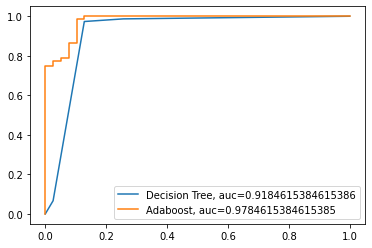

In [66]:
#Plot the ROC curves
tree_fpr, tree_tpr, tree_thresh, tree_auc = roc_auc(gini_tree, X_test, Y_test)
ada_fpr, ada_tpr, ada_thresh, ada_auc = roc_auc(ada, X_test, Y_test)

plt.figure(0).clf()
plt.plot(tree_fpr,tree_tpr,label="Decision Tree, auc="+str(tree_auc))
plt.plot(ada_fpr,ada_tpr,label="Adaboost, auc="+str(ada_auc))

plt.legend(loc=0)

In [67]:
best_alpha = 0.01
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train, y=Y_train)
ada = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train)

tree_fpr, tree_tpr, tree_thresh, tree_auc = roc_auc(gini_tree, X_test, Y_test)
ada_fpr, ada_tpr, ada_thresh, ada_auc = roc_auc(ada, X_test, Y_test)

np.testing.assert_almost_equal(tree_fpr, [0.        , 0.02564103, 0.12820513, 0.25641026, 1.        ])
np.testing.assert_almost_equal(tree_tpr, [0.        , 0.06666667, 0.97333333, 0.98666667, 1.        ])
np.testing.assert_almost_equal(tree_thresh, [2.        , 1.        , 0.98127341, 0.11111111, 0.        ])
assert tree_auc == 0.9184615384615386

np.testing.assert_almost_equal(ada_fpr, [0.        , 0.        , 0.        , 0.02564103, 0.02564103,
       0.05128205, 0.05128205, 0.07692308, 0.07692308, 0.1025641 ,
       0.1025641 , 0.12820513, 0.12820513, 1.        ])
np.testing.assert_almost_equal(ada_tpr, [0.        , 0.01333333, 0.74666667, 0.74666667, 0.77333333,
       0.77333333, 0.78666667, 0.78666667, 0.86666667, 0.86666667,
       0.98666667, 0.98666667, 1.        , 1.        ])
np.testing.assert_almost_equal(ada_thresh, [1.84880167, 0.84880167, 0.62659665, 0.61650091, 0.61379135,
       0.61073422, 0.60757132, 0.60626897, 0.58565245, 0.58018733,
       0.53578899, 0.52133361, 0.45605993, 0.15915035])
assert ada_auc == 0.9784615384615385

In [68]:
# Remember there are hidden tests

### 2.2 Intepreting ROC curves

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other?

As in the above plot, when the false positives are less the area under the curve for AdaBoostClassifier is greater than the area under DecisionTreeClassifier and when the false positives gradually increase, the true positive rate for both the classifier almost converge with each other. Since in overall the AdaBoostClassifier has greater area over the DecisionTreeClassifier, AdaBoostClassifier is better than the other.

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.